# Module 2: Cross-Validation

In this lab you will learn about another important methodology for evaluating the machine learning model, 
namely **cross-validation**,
which involves the splitting dataset into multiple folds then validate on one of them after training the model on the rest of the folds.
This establishes a reliable performance measure that assesses how the model will likely to generalize to an independent data set.
Cross-validation is widely used for estimating test error for the following reasons:

1. Provides less biased evaluation, which in turn, helps you reduce overfitting.
2. Provides reliable way to validate model when no explicit validation set is made available.

We are going to use **Gaussian Naive Bayes model** to fit the **red wine quality** dataset and create 5-fold and 10-fold cross-validation then compare.
There are different variations of cross-validation and we will take a closer look into **K-fold cross-validation**.

sklearn API reference:

+ [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB


## Load Dataset

Load dataset from files into Panda data frame.

In [2]:
# Dataset location
DATASET = '/dsa/data/all_datasets/wine-quality/winequality-red.csv'
assert os.path.exists(DATASET)

# Load and shuffle
dataset = pd.read_csv(DATASET, sep=';').sample(frac = 1).reset_index(drop=True)
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Cross-validation with sklearn

In this example, we use a few of the feature columns as input **X** and the `quality` column as output **y**.
Then perform a 5-fold cross-validation using **cross_val_score()**,
which splits the data into 5 folds (based on the **cv** argument).
Then for each fold it fits the data on 4 folds and scores the 5th fold.
Then it gives you the 5 scores from which you can calculate a mean and variance for the score.
This potentially allows you to cross-validate in order to tune parameters and get an estimate of the score. 

Note that the cross-validation process involves fitting the model by definition,
so you don't need to fit the model prior to cross-validation.

In [4]:
model = GaussianNB()

# Convert the loaded dataset (data frame) into a multi-dimensional array with columns 
# 1,2,6,7,10 as input data
X = dataset.iloc[:, [1,2,6,9,10]]
    
# Slice out the quality column as the expected value.
y = np.array(dataset.quality)

# Do the cross-validation
sklearn.model_selection.cross_val_score(model, X, y, cv=5)

array([0.55625   , 0.559375  , 0.646875  , 0.578125  , 0.57680251])

Above shows 5 scores from the 5-fold cross-validation.
For each round of cross-validation, the model was fit on 4 of the folds and scored on the one held out.
You should see different model scores, five in this case.
This indicates that certain training instances validated against their test fold better than others.

**Next, we will be sure to get very familiarized with this workflow by implementing our own. 
Then discuss.**

## Create folds

The original dataset should be **randomly** sampled into equal-sized folds.
But here the random resample was already done when we loaded the dataset previously.

Now we split the data into 5 folds. 
This can be achieved using **array_split()** from numpy.

In [5]:
help(np.array_split)

Help on function array_split in module numpy:

array_split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays.
    
    Please refer to the ``split`` documentation.  The only difference
    between these functions is that ``array_split`` allows
    `indices_or_sections` to be an integer that does *not* equally
    divide the axis. For an array of length l that should be split
    into n sections, it returns l % n sub-arrays of size l//n + 1
    and the rest of size l//n.
    
    See Also
    --------
    split : Split array into multiple sub-arrays of equal size.
    
    Examples
    --------
    >>> x = np.arange(8.0)
    >>> np.array_split(x, 3)
        [array([0.,  1.,  2.]), array([3.,  4.,  5.]), array([6.,  7.])]
    
    >>> x = np.arange(7.0)
    >>> np.array_split(x, 3)
        [array([0.,  1.,  2.]), array([3.,  4.]), array([5.,  6.])]



In [6]:
X_folds = np.array_split(X, 5) # split the array into 5 chunks by rows chunks (axis = 0)
[i.shape for i in X_folds]   # check the number of instances per fold

[(320, 5), (320, 5), (320, 5), (320, 5), (319, 5)]

We have around 1600 entries and 5 types of features in the input, so we have confirmed their shapes look good after splitting.
The following demonstrates how **array_split()** behaves on dataset size that aren't evenly divisible by number of folds.
This has ensured that the folds are divided as evenly as possible.
Same could be achieved via array slicing, but would look more complicated.

In [7]:
for t in range(120, 130):
    print(t, 'entries into', 10, 'folds:', [i.shape[0] for i in np.array_split(np.zeros(t), 10)])

120 entries into 10 folds: [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
121 entries into 10 folds: [13, 12, 12, 12, 12, 12, 12, 12, 12, 12]
122 entries into 10 folds: [13, 13, 12, 12, 12, 12, 12, 12, 12, 12]
123 entries into 10 folds: [13, 13, 13, 12, 12, 12, 12, 12, 12, 12]
124 entries into 10 folds: [13, 13, 13, 13, 12, 12, 12, 12, 12, 12]
125 entries into 10 folds: [13, 13, 13, 13, 13, 12, 12, 12, 12, 12]
126 entries into 10 folds: [13, 13, 13, 13, 13, 13, 12, 12, 12, 12]
127 entries into 10 folds: [13, 13, 13, 13, 13, 13, 13, 12, 12, 12]
128 entries into 10 folds: [13, 13, 13, 13, 13, 13, 13, 13, 12, 12]
129 entries into 10 folds: [13, 13, 13, 13, 13, 13, 13, 13, 13, 12]


Same for Y folds.

In [8]:
y_folds = np.array_split(y, 5)
[i.shape for i in y_folds]

[(320,), (320,), (320,), (320,), (319,)]

## Cross-validation

For each round **i**:
1. concatenate all folds _except fold **#i**_ to create the training set and fit the model
2. then score the model based on the fold **#i** that was withheld from training.

Each round is similar to what's been covered in Module 1: Train and Validate.

In [9]:
for i in range(5):
    X_train = np.concatenate([X_folds[j] for j in range(5) if j!=i])
    X_test = X_folds[i]
    y_train = np.concatenate([y_folds[j] for j in range(5) if j!=i])
    y_test = y_folds[i]
    print('CV', i,
          'X_train', X_train.shape, 'X_test', X_test.shape,
          'y_train', y_train.shape, 'y_test', y_test.shape)
    model.fit(X_train, y_train)
    print('Score:', round(model.score(X_test, y_test), 2))

CV 0 X_train (1279, 5) X_test (320, 5) y_train (1279,) y_test (320,)
Score: 0.56
CV 1 X_train (1279, 5) X_test (320, 5) y_train (1279,) y_test (320,)
Score: 0.55
CV 2 X_train (1279, 5) X_test (320, 5) y_train (1279,) y_test (320,)
Score: 0.62
CV 3 X_train (1279, 5) X_test (320, 5) y_train (1279,) y_test (320,)
Score: 0.58
CV 4 X_train (1280, 5) X_test (319, 5) y_train (1280,) y_test (319,)
Score: 0.59


## Putting things together

Now we can replicate the general functionality of **cross_val_score()** from sklearn, 
and have a better understanding of the cross-validation workflow.

**Note:** As an exercise to help you get in the habit of congnitively processing code you read, instead of just running it, 
you could comment each code line with your interpretation.

In [10]:
def cross_val_score(model, X, y, cv = 10):
    X_folds = np.array_split(X, cv)
    Y_folds = np.array_split(y, cv)
    
    for i in range(cv):
        X_train = np.concatenate([X_folds[j] for j in range(cv) if j!=i])
        X_test = X_folds[i]
        y_train = np.concatenate([Y_folds[j] for j in range(cv) if j!=i])
        y_test = y_folds[i]
        model.fit(X_train, y_train)
        yield round(model.score(X_test, y_test), 3)



print('Our CV    :', list(cross_val_score(model, X, y, cv=5)))
print('sklearn CV:', np.around(sklearn.model_selection.cross_val_score(model, X, y, cv=5), 3))

Our CV    : [0.556, 0.553, 0.616, 0.578, 0.589]
sklearn CV: [0.556 0.559 0.647 0.578 0.577]


## 5-fold vs 10-fold cross-validation

While the implementation of **k**-fold cross-validation is straightforward, 
it's important that we understand the strengths and limitations of this methodology before its application.

In [11]:
s5 = sklearn.model_selection.cross_val_score(model, X, y, cv=5)
s10 = sklearn.model_selection.cross_val_score(model, X, y, cv=10)
print('5-fold mean', np.mean(s5), 'variance', np.var(s5))
print('10-fold mean', np.mean(s10), 'variance', np.var(s10))

5-fold mean 0.5834855015673981 variance 0.001082942945050166
10-fold mean 0.5791037735849056 variance 0.0011083787602349604


In [12]:
print('5-fold scores', s5)
print('10-fold scores', s10)

5-fold scores [0.55625    0.559375   0.646875   0.578125   0.57680251]
10-fold scores [0.56875    0.54375    0.55       0.53125    0.64375    0.6125
 0.6125     0.58125    0.58125    0.56603774]


It is a known issue that cross-validated scores can have large variance especially on smaller datasets.
Here we compare 5-fold vs 10-fold cross-validation, and 10-fold cross-validation has shown higher variance. 

+ Larger number of folds usually means less bias. However, as we use more folds, the testing dataset also gets smaller, and variance of cross-validation scores increases.
+ Too large number of folds mean that only a low number of sample combinations is possible, thus limiting the number of iterations that are different. That is to say the training data/testing data for each round will have large overlap.

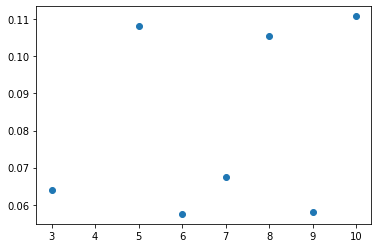

In [13]:
# Note: Second argument is a list-comprehension generated by running the for-loop of cross_val_score()
plt.scatter([3,5,6,7,8,9,10],
    [np.var(sklearn.model_selection.cross_val_score(model, X, y, cv=i))*100 for i in [3,5,6,7,8,9,10]])

Above figure shows how variance of scores changes with respect to number of folds used.

In order to lower the variance of the cross-validation result, you should iterate the cross-validation with new random splits.
If possible, use a number of folds that is a divisor of the sample size.

_Limitations of cross-validation are mostly relevant to small datasets._

## Conclusion

In this lab we learned about:

+ Cross-validation workflow and its implementation
+ Compared 5-fold vs 10-fold cross-validation
+ Strengths and limitations of k-fold validation